In [23]:
import numpy as np
np.random.seed(42)
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando Dataset

In [7]:

#df = pd.read_parquet('data/raw/yellow/2023/01/yellow_2023-01.parquet', engine='fastparquet')

df = pd.read_parquet(
   "data/raw/yellow/2023/01/yellow_2023-01.parquet", 
   engine='auto', 
   columns=None, 
   storage_options=None
)


In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [20]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.995023e+06,2995023,2995023,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06
mean,1.731985e+00,2023-01-17 00:29:11.505633280,2023-01-17 00:44:50.058147072,1.362532e+00,3.436199e+00,1.497440e+00,1.664399e+02,1.644651e+02,1.223096e+00,1.830827e+01,1.569120e+00,4.880263e-01,3.359193e+00,5.202260e-01,9.817241e-01,2.696976e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:28:23,2023-01-09 16:43:19.500000,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:59,2023-01-17 08:58:54,1.000000e+00,1.780000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.002000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27.500000,2023-01-24 16:42:44,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.140000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,6.235952e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.429253e-01,NaN,NaN,8.961200e-01,4.209135e+01,6.474767e+00,6.406785e+01,6.992720e+01,5.020600e-01,1.789325e+01,1.795131e+00,1.046392e-01,3.840552e+00,2.021865e+00,1.853866e-01,2.226908e+01,7.718454e-01,3.556511e-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [11]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [13]:
df.duplicated().sum()

0

## Excluindo registros com dados nulos

In [14]:
df = df.dropna(how='any',axis=0)

/tmp/ipykernel_123/2476879406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trips_bytime,ax=ax1, bins=100, color='#4DABAE')


Text(0.5, 0, 'Pickup Time')

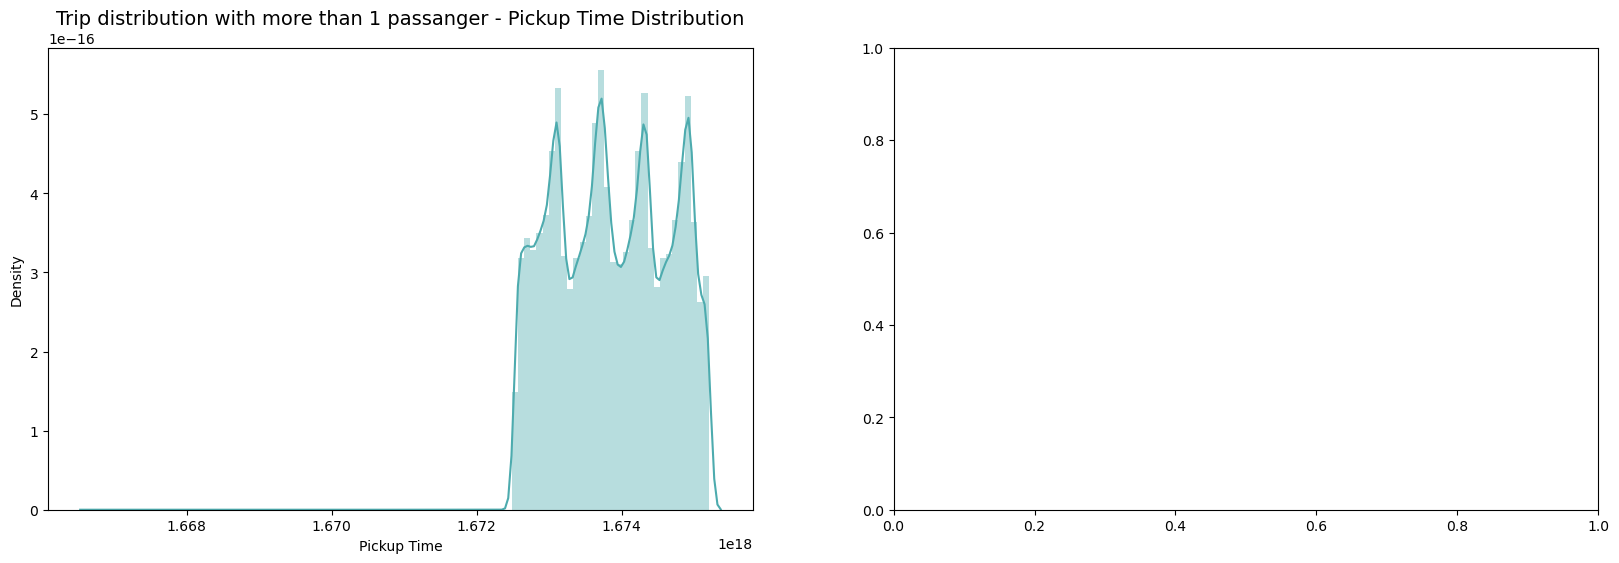

In [31]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

trips_bytime = df['tpep_pickup_datetime'].loc[df['passenger_count'] > 1].values
sns.distplot(trips_bytime,ax=ax1, bins=100, color='#4DABAE')
ax1.set_title('Trip distribution with more than 1 passanger - Pickup Time Distribution', fontsize=14)
ax1.set_xlabel('Pickup Time')